In [2]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.stats import poisson
from scipy.stats import expon
from scipy.stats import geom


# 1-1:  
variance and mean of each distribution was calculated 

In [13]:

poi_lambda = 10
poi_mean = poi_lambda
poi_var = poi_lambda

print(f'Poi Mean: {poi_mean}')
print(f'Poi Variance: {poi_var}\n')



expo_lambda = 1 / 2
expo_mean = 1 / expo_lambda
expo_var = 1 / (expo_lambda ** 2)

print(f'Expo Mean: {expo_mean}')
print(f'Expo Variance: {expo_var}\n')


p_geometric = 1 / 5
geo_mean = 1 / p_geometric
geo_var = (1 - p_geometric) / (p_geometric ** 2)

print(f'Geo Mean: {geo_mean}')
print(f'Geo Variance: {geo_var}')

Poi Mean: 10
Poi Variance: 10

Expo Mean: 2.0
Expo Variance: 4.0

Geo Mean: 5.0
Geo Variance: 19.999999999999996


# 1-2:

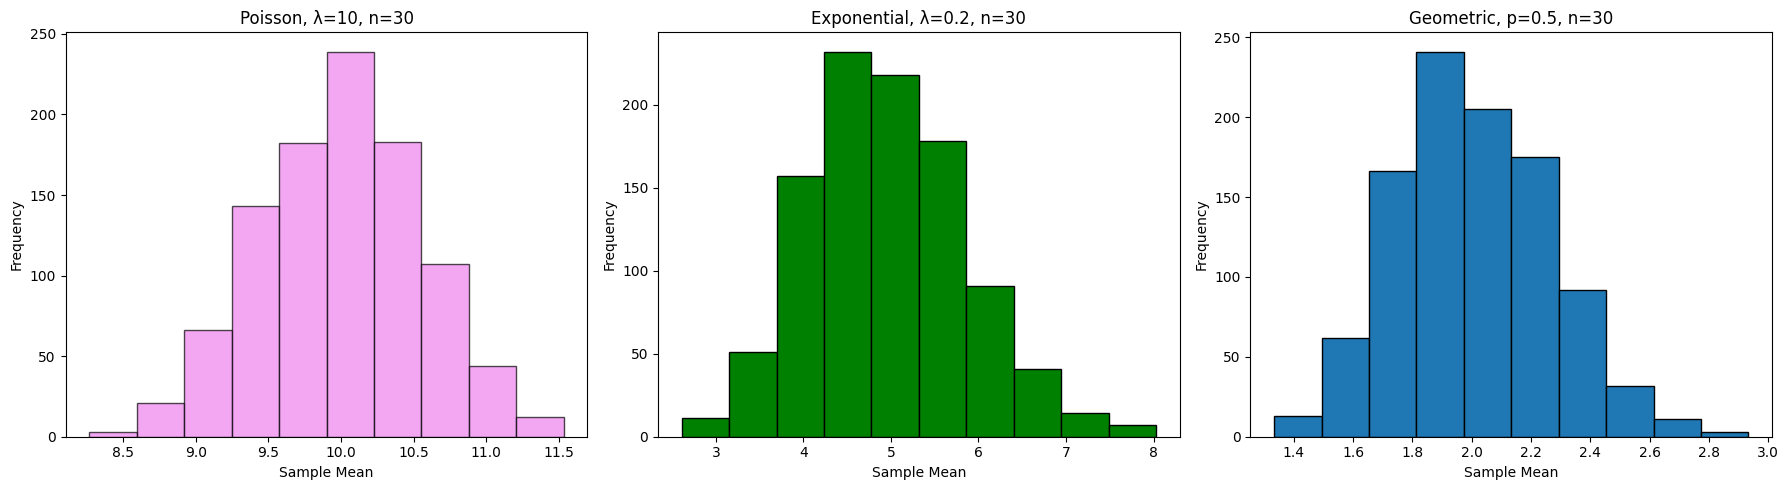

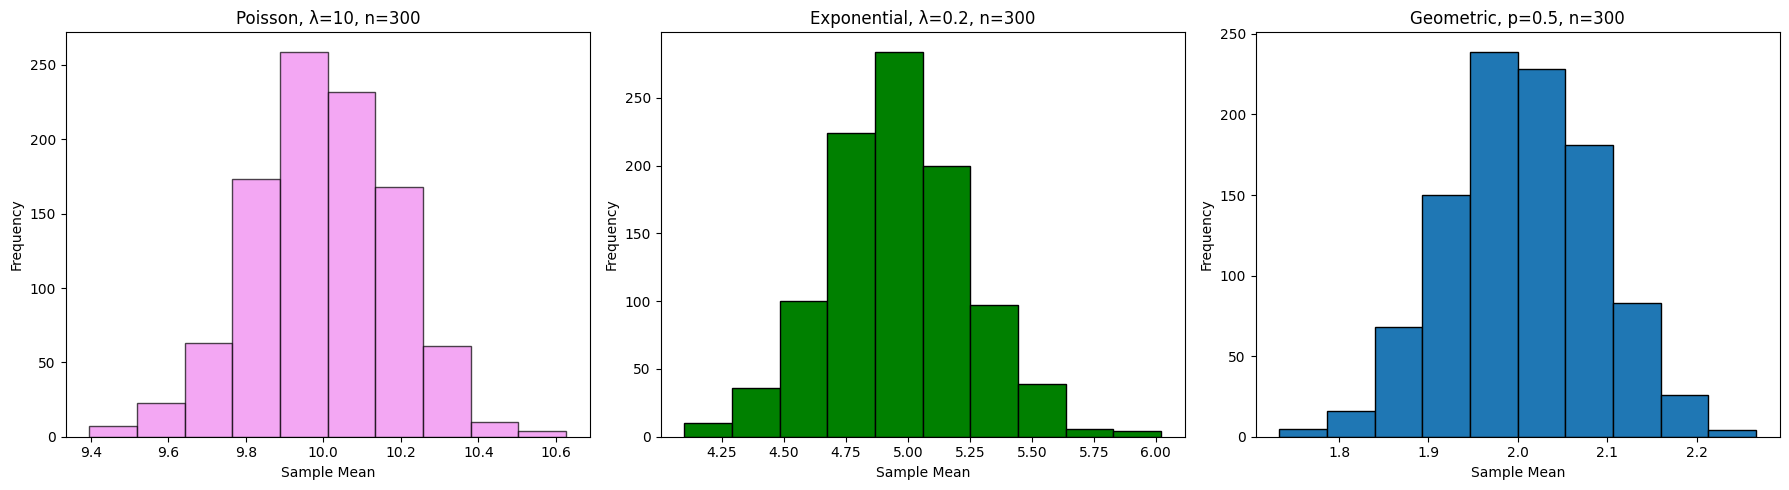

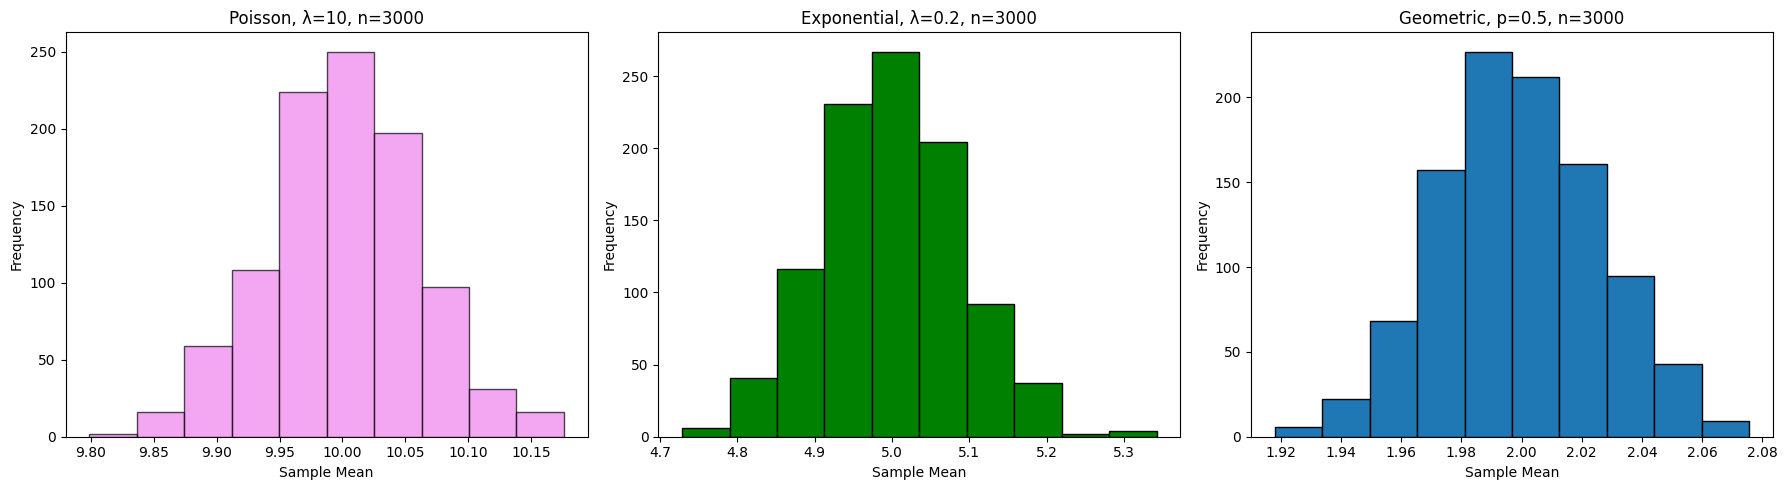

In [4]:

poi_lambda = 10
n_values = [30, 300, 3000]
size = 1000

sample_means_poi = {}


for n in n_values:
    samples_mean_poi = []
    for i in range(size):
        sample_poisson = np.random.poisson(poi_lambda, n)
        samples_mean_poi.append(np.mean(sample_poisson))
    sample_means_poi[n] = samples_mean_poi





sample_means_exp = {}

for n in n_values:
    sample_mean_exp = []
    for i in range(size):
        sample_exponential = np.random.exponential(1 / expo_lambda, n)
        sample_mean_exp.append(np.mean(sample_exponential))
    sample_means_exp[n] = sample_mean_exp



sample_means_geo = {}
for n in n_values:
    samples_mean_geo = []
    for i in range(size):
        sample_geometric = np.random.geometric(p_geometric, n)
        samples_mean_geo.append(np.mean(sample_geometric))
    sample_means_geo[n] = samples_mean_geo



for n in n_values:
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    
    axes[0].hist(sample_means_poi[n], edgecolor='black',color="violet", alpha=0.7)
    axes[0].set_title(f'Poisson, λ={poi_lambda}, n={n}')
    axes[0].set_xlabel('Sample Mean')
    axes[0].set_ylabel('Frequency')
    
    
    axes[1].hist(sample_means_exp[n],  edgecolor='black', color="green")
    axes[1].set_title(f'Exponential, λ={expo_lambda}, n={n}')
    axes[1].set_xlabel('Sample Mean')
    axes[1].set_ylabel('Frequency')
    

    axes[2].hist(sample_means_geo[n],  edgecolor='black')
    axes[2].set_title(f'Geometric, p={p_geometric}, n={n}')
    axes[2].set_xlabel('Sample Mean')
    axes[2].set_ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()



#  1-3:
as sample size increases experimental mean will approach its theoradical value and standard error gets closer to zero

In [5]:
mean_of_means_exp = {}
mean_of_means_poi = {}
mean_of_means_geo = {}
se_of_means_exp = {}
se_of_means_poi = {}
se_of_means_geo = {}

for n in n_values:
    mean_of_means_exp[n] = np.mean(sample_means_exp[n])
    mean_of_means_poi[n] = np.mean(sample_means_poi[n])
    mean_of_means_geo[n] = np.mean(sample_means_geo[n])
    
    se_of_means_exp[n] = stats.sem(sample_means_exp[n])
    se_of_means_poi[n] = stats.sem(sample_means_poi[n])
    se_of_means_geo[n] = stats.sem(sample_means_geo[n])
    
    print(f'Exponential, mean: {mean_of_means_exp[n]:.3f}, SE: {se_of_means_exp[n]:.3f}, n={n}')
    print(f'Poisson, mean: {mean_of_means_poi[n]:.3f}, SE: {se_of_means_poi[n]:.3f}, n={n}')
    print(f'Geometric, mean: {mean_of_means_geo[n]:.3f}, SE: {se_of_means_geo[n]:.3f}, n={n}\n')



Exponential, mean: 4.956, SE: 0.028, n=30
Poisson, mean: 9.996, SE: 0.018, n=30
Geometric, mean: 2.001, SE: 0.008, n=30

Exponential, mean: 4.962, SE: 0.009, n=300
Poisson, mean: 10.002, SE: 0.006, n=300
Geometric, mean: 2.004, SE: 0.003, n=300

Exponential, mean: 4.999, SE: 0.003, n=3000
Poisson, mean: 10.001, SE: 0.002, n=3000
Geometric, mean: 1.999, SE: 0.001, n=3000



# 1-4:
as n increases the histogram becomes more and more similiar to a normal distribution with its mean and devitation close to our sample mean and deviation.

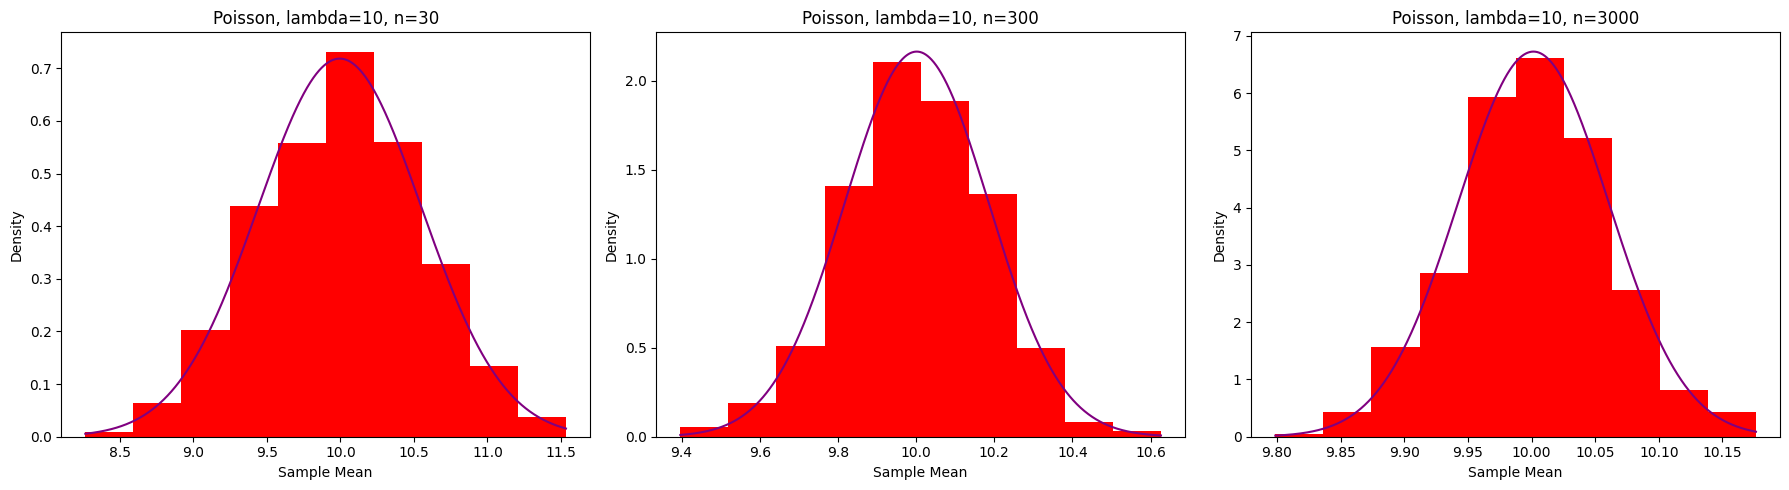

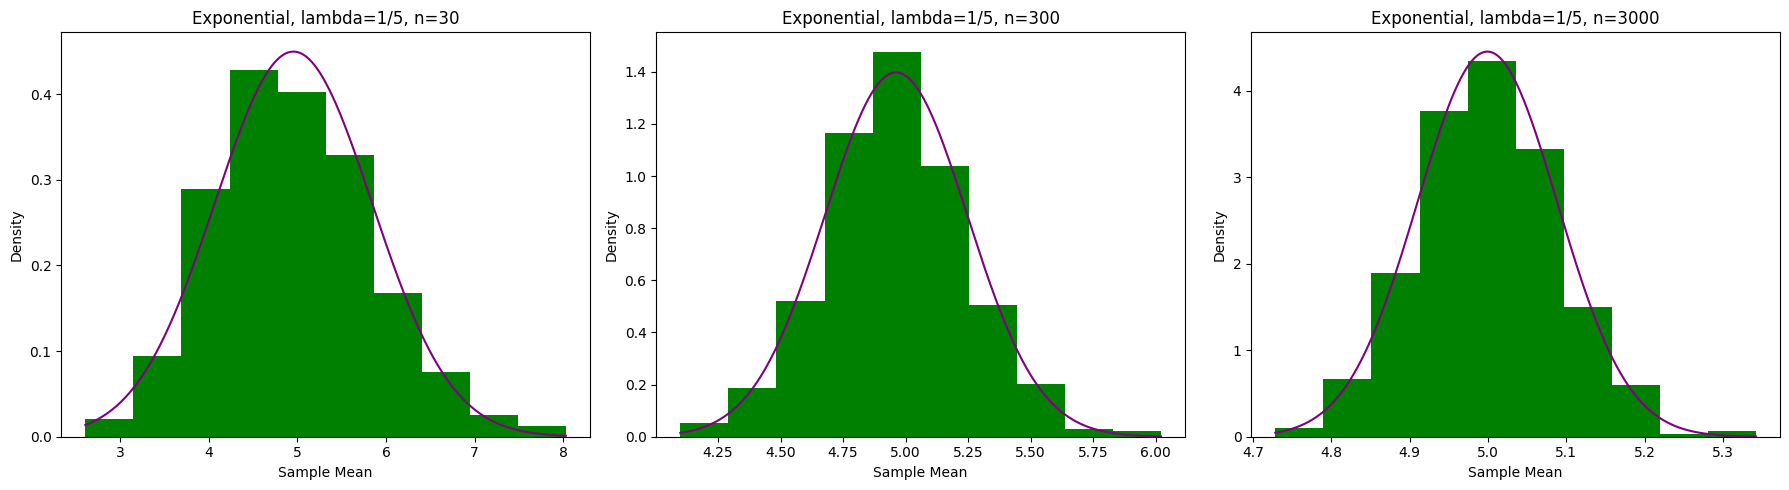

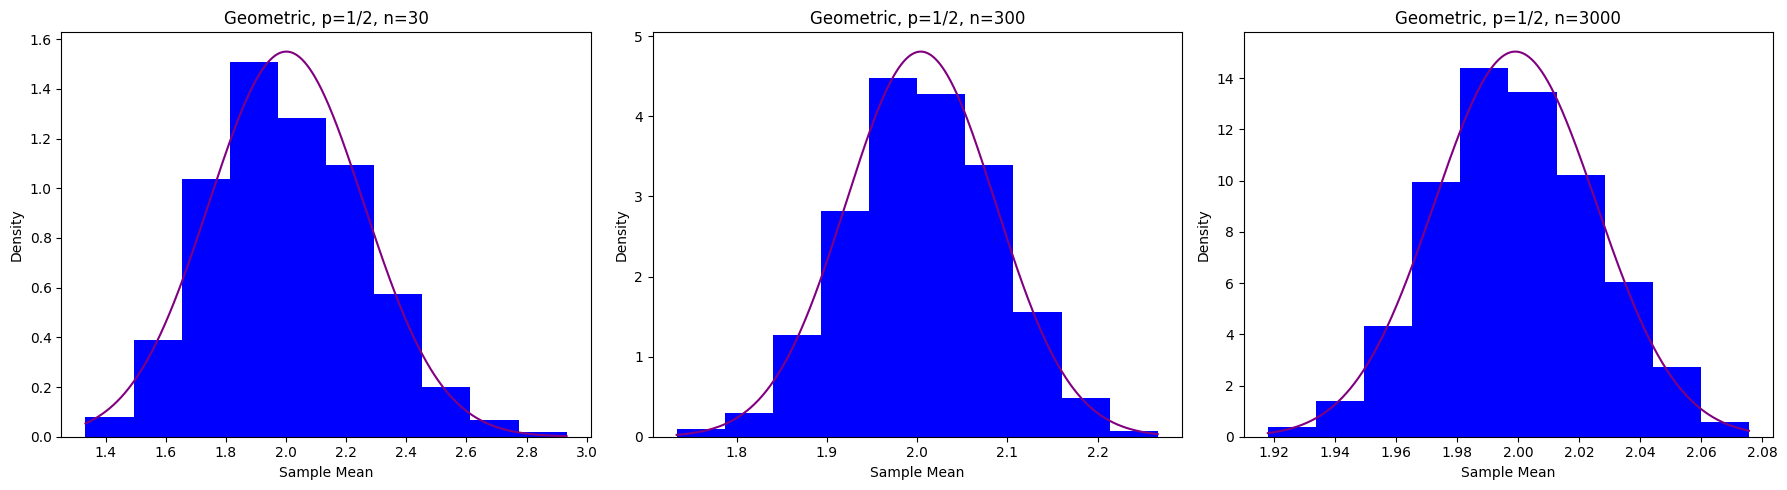

In [6]:

def plot_norm(sample_means, dist_name,colors):
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    for i,n in enumerate(n_values):
        axes[i].hist(sample_means[n],density=True,color=colors)
        mean = np.mean(sample_means[n])
        dev = np.var(sample_means[n])**0.5
        x = np.linspace(min(sample_means[n]), max(sample_means[n]), 1000)
        y = stats.norm.pdf(x, mean, dev)
        axes[i].plot(x, y,color="purple")
        axes[i].set_title(f'{dist_name}, n={n}')
        axes[i].set_xlabel('Sample Mean')
        axes[i].set_ylabel('Density')
    plt.tight_layout()
    plt.show()
plot_norm(sample_means_poi,'Poisson, lambda=10',"red")
plot_norm(sample_means_exp,'Exponential, lambda=1/5',"green")
plot_norm(sample_means_geo,'Geometric, p=1/2',"blue")


# 1-5:
we got three different distribution and as n increases it becomes similiar to 3  dirac deltas.

Sample size 30:
  Actual Mean = 5.52, Actual SE = 3.2970
Sample size 300:
  Actual Mean = 5.79, Actual SE = 3.3165
Sample size 3000:
  Actual Mean = 5.77, Actual SE = 3.3635


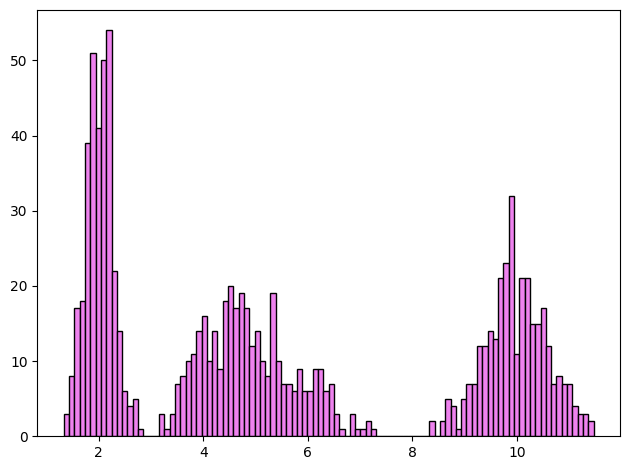

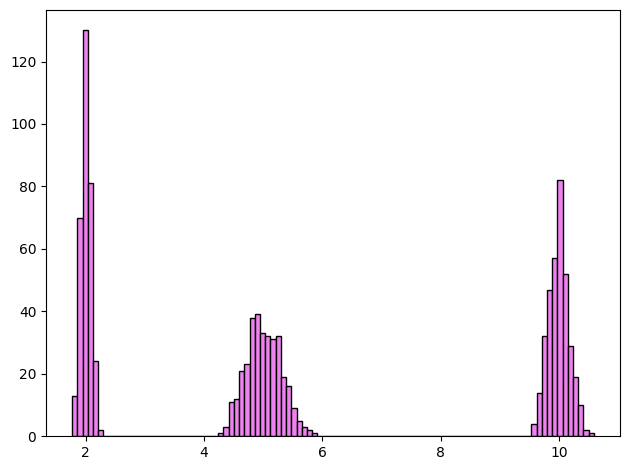

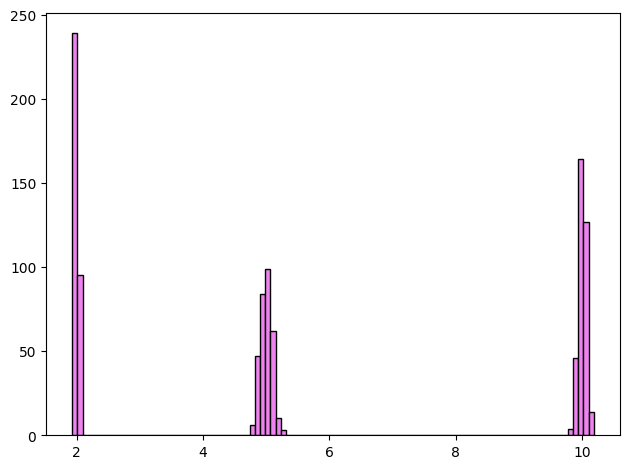

In [7]:

mixed_sample = {}
for n in n_values:
    sample_means_mixed = []
    for i in range(size):
        rand = random.choice([0, 1, 2])
        if rand == 0:
            sample = np.random.poisson(poi_lambda, n)
        elif rand == 1:
            sample = np.random.geometric(p_geometric, n)
        else:
            sample = np.random.exponential(1 / expo_lambda, n)
        sample_means_mixed.append(np.mean(sample))
    mixed_sample[n] = sample_means_mixed



    actual_mean = np.mean(mixed_sample[n])
    actual_se = np.std(mixed_sample[n],ddof=1)
    print(f"Sample size {n}:")
    print(f"  Actual Mean = {actual_mean:.2f}, Actual SE = {actual_se:.4f}")


for n in n_values:
    plt.hist(mixed_sample[n], edgecolor='black',bins=100,color="violet")

    
    plt.tight_layout()
    plt.show()
            
       

# 1-6:
since the distributions are not i.i.d we cant compute its variance properly(since mean is linear it can equal to mean of three distrbutions) as n approaches infinity three dirac deltas are created and we can use calculate the variance with formula shown below.

In [8]:

theoretical_mean = (poi_mean + expo_mean + geo_mean) / 3
theoretical_variance = ((poi_mean-theoretical_mean)**2 + (expo_mean-theoretical_mean)**2 + (geo_mean-theoretical_mean)**2) / 3
print("mean" ,theoretical_mean)
print("std if n=infinty :",theoretical_variance**0.5)


mean 5.666666666666667
std if n=infinty : 3.299831645537222


# 1-7: 
since distributions are not i.i.d their addition is not jointly normal, CLT is only applicable when distributions are i.i.d.

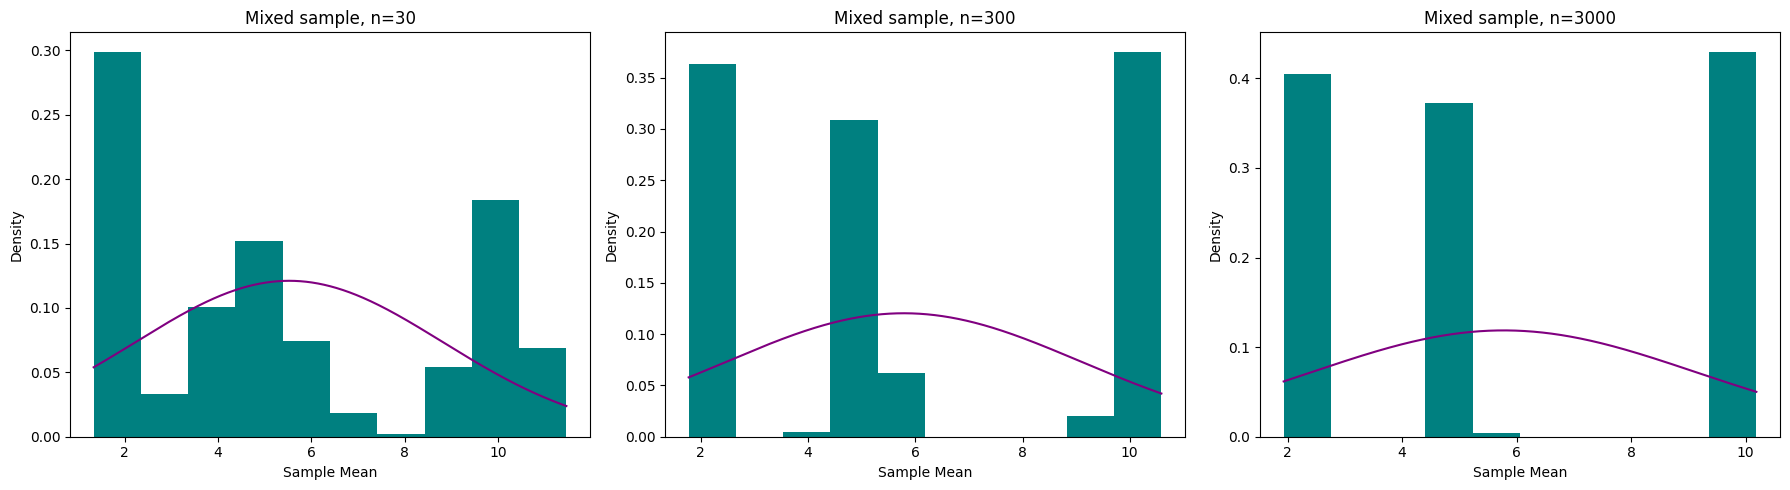

In [9]:


plot_norm(mixed_sample,"Mixed sample","teal")